In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image

## Gather
### WeRateDogs Twitter Archive

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
response = requests.get(url)    

In [4]:
with open(filename, mode='wb') as file:
    file.write(response.content)

In [5]:
image_predictions = pd.read_csv(filename, sep='\t')

### Twitter API

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
tweet_ids = df.tweet_id.values

In [ ]:
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
filename = url.split('/')[-1]
response = requests.get(url)

In [7]:
with open(filename, mode='wb') as json_file:
    json_file.write(response.content)

In [8]:
tweet_id = []
retweet_count = []
favorite_count =[]
tweet_date = []
with open('tweet-json.txt') as json_file:
    for ids in json_file:
        tweet = json.loads(ids)
        tweet_id.append(tweet['id'])
        retweet_count.append(tweet['retweet_count'])
        favorite_count.append(tweet['favorite_count'])

In [9]:
df_api = pd.DataFrame({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count':favorite_count})

## Assess 
### WeRateDogs Twitter Archive

In [10]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
50,882627270321602560,NaN,NaN,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,None,None,None,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,None,None,None,None
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673887867...,10,10,None,None,None,None,None
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Quality
- Incorrect data types for `tweet_id`, `timestamp`, columns
- Missing names, incorrect name tagged
- Replies and retweets included in dataset
- `text` includes link
- Incorrect extracted ratings (416, 878, 1407, 2054)
- Maximum for `rating_denominator` 170
- Missing values for `doggo`, `floofer`, `pupper`, `puppo` represented as string '*None*'

#### Tidiness
- Separate columns for dog levels(`doggo`, `pupper`, `puppo`, `floofer`) 

### Image Predictions

In [15]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_predictions.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
580,678767140346941444,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False
915,701214700881756160,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Quality
- Incorrect data type for `tweet_id`
- Dog breed capitalization

#### Tidiness
- Multiple columns for breed predictions
- Can be merged with twitter archive dataset

### Twitter API

In [20]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Quality
- Incorrect data type for `tweet_id`

#### Tidiness
- Can be merged with twitter archive dataset

## Clean

In [22]:
# Create copy of each dataframe

df_clean = df.copy()
image_predictions_clean = image_predictions.copy()
df_api_clean = df_api.copy()

### Missing Values
- Missing names, incorrect name tagged
- Missing values for `doggo`, `floofer`, `pupper`, `puppo` represented as string '*None*'

#### Missing names, incorrect name tagged
**DEFINE**

Repopulate `name` column using for loop, if statements, and combination of string methods to extract name. Strings *'name is', 'named', 'This is', 'Meet', and 'hello to'* are typically used before introducing the name. Texts not meeting the condition will be populated as null. (*Missing names issue addressed here*)

**CODE**

In [23]:
new_name = []
for i in df_clean['text']:
    if i.find('name is') != -1:
        new_name.append(i.partition('name is')[-1].split()[0].strip('.'))
    elif i.find('named') != -1:
        new_name.append(i.partition('named')[-1].split()[0].strip('.'))
    elif i.find('This is')!= -1:
        if i.partition('This is')[-1].split()[0].strip('.').islower():
            new_name.append(np.nan)
        else:
            new_name.append(i.partition('This is')[-1].split()[0].strip('.'))
    elif i.find('Meet') != -1:
        new_name.append(i.partition('Meet')[-1].split()[0].strip('.'))
    elif i.find('hello to') != -1:
        new_name.append(i.partition('hello to')[-1].split()[0].strip('.'))
    else:
        new_name.append(np.nan)

df_clean['name'] = new_name

**TEST**

In [24]:
df_clean.name.sample(5)

1072     Nollie
2201        NaN
1629      Bobby
1465    Oliviér
2161    Alfredo
Name: name, dtype: object

In [25]:
# Confirm if there are 'None' values
(df_clean.name == 'None').sum()

0

In [26]:
# Compare lower case names in df with df_clean
df.name.str.islower().sum(), df_clean.name.str.islower().sum()

(109, 3)

All 'None' values now replaced as NaN and incorrectly extracted names with lower case have substantially decreased. Furthermore, more names were correctly extracted in comparison to the orginal table.

#### Missing values for `doggo`, `floofer`, `pupper`, `puppo` represented as string '*None*'
**DEFINE**

Extract dog level values from  `text` column using *doggo, Doggo, puppo, Puppo, pupper, floofer, Floofer*, otherwise, return null value.

**CODE**

In [27]:
doggo = []
for i in df_clean['text']:
    if 'doggo' in i:
        doggo.append('doggo')
    elif 'Doggo' in i:
        doggo.append('doggo')
    else:
        doggo.append(np.nan)
        
pupper = []
for i in df_clean['text']:
    if 'pupper' in i:
        pupper.append('pupper')
    elif 'Pupper' in i :
        pupper.append('pupper')
    else:
        pupper.append(np.nan)
                
puppo = []
for i in df_clean['text']:
    if 'puppo' in i:
        puppo.append('puppo')
    elif 'Puppo' in i:
        puppo.append('puppo')
    else:
        puppo.append(np.nan)     

floofer = []
for i in df_clean['text']:
    if 'floofer' in i:
        floofer.append('floofer')
    elif 'Floofer'in i:
        floofer.append('floofer')
    else:
        floofer.append(np.nan)

df_clean['doggo'] = doggo
df_clean['pupper'] = pupper
df_clean['puppo'] = puppo
df_clean['floofer'] = floofer

**TEST**

In [28]:
df_clean[['doggo', 'puppo','pupper','floofer']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    106 non-null    object
 1   puppo    38 non-null     object
 2   pupper   279 non-null    object
 3   floofer  10 non-null     object
dtypes: object(4)
memory usage: 73.8+ KB


The 4 dog stages are now extracted and all 'None' values are now replaced as NaN.

### Tidiness
To make our data tidy, we need to address one issue for each dataset:

- **Twitter Archive:** Separate columns for dog levels(`doggo`, `pupper`, `puppo`, `floofer`)
- **Image Predictions:** Multiple columns for breed predictions
- Merge all three datasets

#### Separate columns for dog levels(`doggo`, `pupper`, `puppo`, `floofer`)
**DEFINE**

Create a new column, `dog_stage`, to identify the dog level for each row using the `doggo`, `pupper`, `puppo`, `floofer`. If there are two classifications, return string "*multiple*". Drop the `doggo`, `pupper`, `puppo`, `floofer` columns once new column is created.

**CODE**

In [29]:
dog_stage_columns = df_clean[['doggo','puppo','pupper','floofer']]

In [30]:
dog_stages = ['doggo','puppo','pupper','floofer']
dog_stage = []

for i in range(len(dog_stage_columns)):
    if dog_stage_columns.loc[i].isnull().all():
        dog_stage.append(np.nan)
    else:
        if dog_stage_columns.loc[i].notnull().sum() > 1:
            dog_stage.append('multiple')
        else:
            for stage in dog_stages:
                if dog_stage_columns.loc[i][stage] == stage:
                    dog_stage.append(stage)
                    break

dog_stage = pd.Series(dog_stage)

In [31]:
df_clean['dog_stage'] = dog_stage

In [32]:
df_clean.drop(['doggo','puppo','pupper','floofer'], axis=1, inplace=True)

**TEST**

In [33]:
df_clean.dog_stage.value_counts()

pupper      267
doggo        91
puppo        36
multiple     15
floofer       9
Name: dog_stage, dtype: int64

#### Multiple columns for breed predictions
**DEFINE**

Create one column for the predicted breed. To identify the predicted breed, we'll choose the most confident prediction given the prediction is a breed of dog. 'False' predictions will be tagged as NaN. 

**CODE**

*Reference: https://stackoverflow.com/questions/51519101/simultaneously-melt-multiple-columns-in-python-pandas*

In [34]:
# melt all the columns per category (breed, confidence, and dog)
breed = image_predictions_clean.melt(['tweet_id', 'jpg_url', 'img_num'], ['p1', 'p2', 'p3'], var_name = 'order', value_name='breed')
conf = image_predictions_clean.melt(['tweet_id', 'jpg_url', 'img_num'], ['p1_conf', 'p2_conf', 'p3_conf'], var_name = 'order', value_name = 'confidence')
dog_bool = image_predictions_clean.melt(['tweet_id', 'jpg_url', 'img_num'], ['p1_dog', 'p2_dog', 'p3_dog'], var_name = 'order', value_name = 'dog')

In [35]:
# replace each value with 1, 2, 3 as identifier
breed.order.replace({'p1':'1', 'p2':'2', 'p3':'3'}, inplace=True)
conf.order.replace({'p1_conf':'1', 'p2_conf':'2', 'p3_conf':'3'}, inplace=True)
dog_bool.order.replace({'p1_dog':'1', 'p2_dog':'2', 'p3_dog':'3'}, inplace=True)

In [36]:
# merge all three tables
df_merge = breed.merge(conf, on=['tweet_id', 'jpg_url', 'img_num','order'])
img_pred_merge = df_merge.merge(dog_bool, on=['tweet_id', 'jpg_url', 'img_num','order'])

In [37]:
breed = []
for i in list(image_predictions.tweet_id.unique()):
    a = img_pred_merge.tweet_id == i # tweet id
    b = img_pred_merge.dog == True # if prediction is a breed of dog
    if img_pred_merge[(img_pred_merge.tweet_id == i)].dog.any():
        breed.append(img_pred_merge.loc[img_pred_merge[(a) & (b)].confidence.idxmax()].breed)
    else:
        breed.append(np.nan)
        
image_predictions_clean['predicted_breed'] = breed

In [38]:
# replace '_' with space
image_predictions_clean['predicted_breed'] = image_predictions_clean.predicted_breed.str.replace('_', ' ')

In [39]:
# change predicted breed string to proper noun using .title() method 
image_predictions_clean['predicted_breed'] = image_predictions_clean['predicted_breed'].str.title()

In [40]:
# drop img_num and all columns related to predictions
image_predictions_clean.drop(['img_num','p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

**TEST**

In [41]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2075 non-null   int64 
 1   jpg_url          2075 non-null   object
 2   predicted_breed  1751 non-null   object
dtypes: int64(1), object(2)
memory usage: 48.8+ KB


In [42]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher


#### Merge all three datasets
**DEFINE**

Merge all three tables on unique identifier, tweet_id.

**CODE**

In [43]:
df_predictions = pd.merge(df_clean, image_predictions_clean, on='tweet_id')

In [44]:
df_merged = pd.merge(df_predictions, df_api, on='tweet_id', how='left')

**TEST**

In [45]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        1423 non-null   object 
 13  dog_stage                   354 n

In [46]:
df_merged.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,predicted_breed,retweet_count,favorite_count
1236,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,NaN,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian Terrier,700.0,2244.0
1464,680100725817409536,NaN,NaN,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680100725...,11,10,NaN,pupper,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,Golden Retriever,1554.0,3891.0
557,787322443945877504,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443...,10,10,Lincoln,NaN,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,Golden Retriever,2032.0,8726.0
960,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,NaN,doggo,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,German Short-Haired Pointer,725.0,2593.0
852,744334592493166593,NaN,NaN,2016-06-19 01:02:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blanket. She has overthrown her human....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744334592...,11,10,Blanket,NaN,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,Samoyed,2412.0,7443.0


### Quality
- Incorrect data types for `tweet_id`, `timestamp`, columns
- Replies and retweets included in dataset
- `text` includes link
- Incorrect extracted ratings (416, 878, 1407, 2054)
- Maximum for `rating_denominator` 170
- `rating_denominator` of more than 10 refers to more than 1 dog
- Drop irrelevant columns

#### Incorrect data types
**DEFINE**

Change the following columns to correct data types:
- `tweet_id`, `dog_level`, `predicted_breed` to category
- `timestamp` to datetime
- `retweet_count`, `favorite_count` to int

**CODE**

In [47]:
# change data type of tweet_id, dog_level, predicted_breed to category

df_merged[['tweet_id', 'dog_stage', 'predicted_breed']] = df_merged[['tweet_id', 'dog_stage', 'predicted_breed']].astype('category')

In [48]:
# change data type of timestamp to datetime

df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

In [49]:
# replace null values for retweet and favorite count to 0 (this step is needed to convert columns to int)

df_merged[['retweet_count', 'favorite_count']] = df_merged[['retweet_count', 'favorite_count']].fillna(0)

In [50]:
# change data type of retweet_count and favorite_count to int

df_merged[['retweet_count', 'favorite_count']] = df_merged[['retweet_count', 'favorite_count']].astype('int')

**TEST**

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   category           
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2075 non-null   datetime64[ns, UTC]
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         81 non-null     float64            
 7   retweeted_status_user_id    81 non-null     float64            
 8   retweeted_status_timestamp  81 non-null     object             
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2075 non-null   int64           

#### Replies and retweets included in dataset
**DEFINE**

Drop rows for retweets and replies using the `in_reply_to_status_id`, `in_reply_to_user_id` and `retweeted_status` columns.

**CODE**

In [52]:
# check if number of values of in_reply_to_status_id and in_reply_to_user_id if equal

df_merged[['in_reply_to_status_id', 'in_reply_to_user_id']].notnull().sum()

in_reply_to_status_id    23
in_reply_to_user_id      23
dtype: int64

In [53]:
# check if number of values for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp if equal

df_merged[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].notnull().sum()

retweeted_status_id           81
retweeted_status_user_id      81
retweeted_status_timestamp    81
dtype: int64

In [54]:
# since all columns for replies and retweet are equal, we can use one column to identify retweets and replies

replies = df_merged[df_merged['in_reply_to_status_id'].notnull()].index
retweets = df_merged[df_merged['retweeted_status_id'].notnull()].index

In [55]:
df_merged.drop(replies, inplace=True)

In [56]:
df_merged.drop(retweets, inplace=True)

**TEST**

In [57]:
df_merged.in_reply_to_status_id.notnull().sum()

0

In [58]:
df_merged.retweeted_status_id.notnull().sum()

0

In [59]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   category           
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

#### `text` includes link
**DEFINE**

Find string '*https:*' and extract all strings before it using .find() method and loop functions.

**CODE**

In [60]:
text = []
for i in df_merged['text']:
    # extract all string before 'https' and assign to variable
    x = i.find('https:') - 1  
    text.append(i[:x])

df_merged['text'] = text

**TEST**

In [61]:
(df_merged.text.str.find('https') > 1).sum()

0

#### *Visual Assessment*: Incorrect extracted ratings (416, 878, 969, 1407, 2054) 
**DEFINE**

Ratings for rows 416, 878, 1407, 2054 are incorrect. Check the text for each row and update ratings.

**CODE**

In [62]:
df_merged.loc[878]['text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP'

In [63]:
df_merged.loc[878,'rating_numerator'] = 14
df_merged.loc[878,'rating_denominator'] = 10

In [64]:
df_merged.loc[1407]['text']

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10'

In [65]:
df_merged.loc[1407,'rating_numerator'] = 10
df_merged.loc[1407,'rating_denominator'] = 10

In [66]:
df_merged.loc[2054]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10'

In [67]:
df_merged.loc[2054,'rating_numerator'] = 9
df_merged.loc[2054,'rating_denominator'] = 10

In [68]:
df_merged.loc[416]['text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:'

In [69]:
# since no ratings available, assign average rating

df_merged.loc[416,'rating_numerator'] = round(df_merged.rating_numerator.mean())
df_merged.loc[416,'rating_denominator'] = 10

In [70]:
df_merged.loc[969]['text']

'Happy 4/20 from the squad! 13/10 for all'

In [71]:
df_merged.loc[969,'rating_numerator'] = 13
df_merged.loc[969,'rating_denominator'] = 10

**TEST**

In [72]:
(df_merged.rating_denominator % 10 != 0).sum()

0

#### Maximum observation for`rating_denominator`is 170 
**DEFINE**

A `rating_denominator` of more than 10 refer to more than 1 dog which was typically multiplied by the number of dogs. To standardize, we'll divide the rating to the number of dogs. 

**CODE**

In [73]:
denominator = df_merged.rating_denominator[df_merged.rating_denominator > 10]

In [74]:
for i, d in zip(denominator.index, denominator):
    divisor = d//10
    df_merged.loc[i, 'rating_denominator'] = int(d / divisor)
    df_merged.loc[i, 'rating_numerator'] = int(df_merged.loc[i]['rating_numerator']/divisor)

**TEST**

In [75]:
df_merged['rating_denominator'][df_merged.rating_denominator > 10].sum()

0

#### Drop irrelevant columns
**DEFINE**

Drop columns `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

**CODE**

In [76]:
df_merged.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1,inplace=True)

**TEST**

In [77]:
df_merged.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,predicted_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,8853,39467


## Save

In [78]:
df_merged.to_csv('twitter_archive_master.csv', index=False)

## Analysis & Visualization

In [79]:
# load the master file

df = pd.read_csv('twitter_archive_master.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   text                1971 non-null   object
 3   expanded_urls       1971 non-null   object
 4   rating_numerator    1971 non-null   int64 
 5   rating_denominator  1971 non-null   int64 
 6   name                1374 non-null   object
 7   dog_stage           336 non-null    object
 8   jpg_url             1971 non-null   object
 9   predicted_breed     1666 non-null   object
 10  retweet_count       1971 non-null   int64 
 11  favorite_count      1971 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 184.9+ KB


In [81]:
# change data type of timestamp to datetime
df['timestamp'] = pd.to_datetime(df.timestamp)

### Top 10 Most Popular Breed

In [82]:
# count the number of breed and sort from highest to lowest

breed = df.predicted_breed.value_counts().head(10).sort_values(ascending=True)
breed

Malamute               33
Pomeranian             41
Samoyed                42
Chow                   48
Toy Poodle             50
Pug                    62
Chihuahua              90
Pembroke               94
Labrador Retriever    106
Golden Retriever      156
Name: predicted_breed, dtype: int64

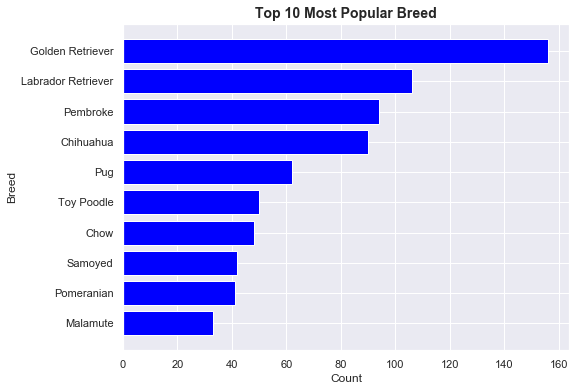

In [84]:
plt.figure(figsize=(8,6))
plt.barh(breed.index, breed, color = 'blue')
plt.title('Top 10 Most Popular Breed', size=14, weight='bold')
plt.xlabel('Count')
plt.ylabel('Breed');

### Top 10 Most Common Name

In [85]:
# count the number of unique names and sort from highest to lowest

name = df.name.value_counts().head(10).sort_values(ascending=True)

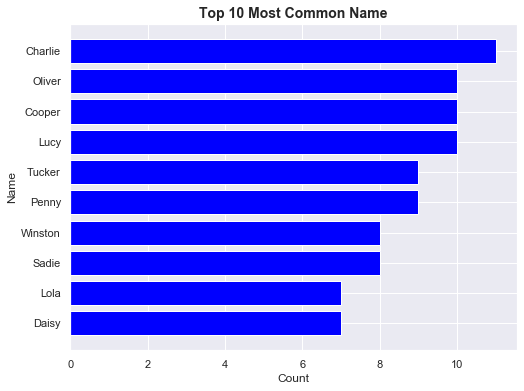

In [86]:
plt.figure(figsize=(8,6))
plt.barh(name.index, name, color='blue')
plt.title('Top 10 Most Common Name', size=14, weight='bold')
plt.xlabel('Count')
plt.ylabel('Name');

### Number of Dogs by Dog Stage

In [87]:
# count the number of rows for each dog stage and sort from highest to lowest

dog_stage = df.dog_stage.value_counts().sort_values(ascending=False)

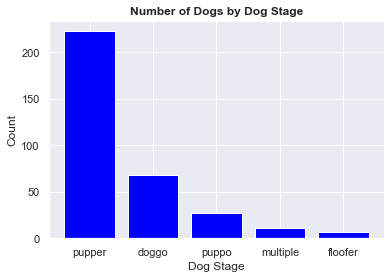

In [88]:
plt.bar(dog_stage.index, dog_stage, color='blue')
plt.title('Number of Dogs by Dog Stage', size=12, weight='bold')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

### Average Rating of Top 10 Most Popular Breed

In [89]:
# list of top 10 most popular breeds

top10_breed = list(breed.index)

In [90]:
rating = df.groupby('predicted_breed').mean().rating_numerator.sort_values(ascending=False)
top10_rating = rating.loc[top10_breed].sort_values(ascending=True)

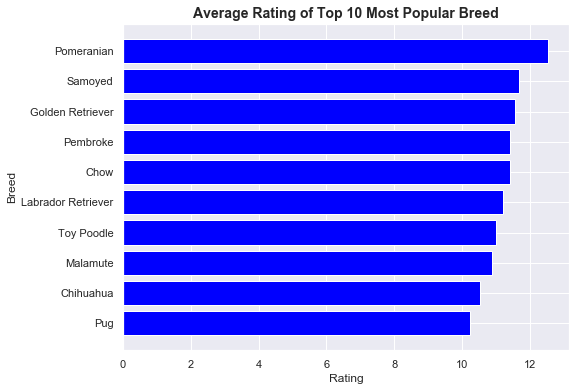

In [91]:
plt.figure(figsize=(8,6))
plt.barh(top10_rating.index, top10_rating, color='blue')
plt.title('Average Rating of Top 10 Most Popular Breed', size=14, weight='bold')
plt.xlabel('Rating')
plt.ylabel('Breed');

### Does rating affects retweet and favorite count?

In [92]:
# assign category 'High' to ratings less than or equal to 10, and 'Very High' to ratings greater than 10 

df['rating'] = df.rating_numerator.map(lambda x: 'High' if x <= 10 else 'Very High')

In [93]:
# average retweet and favorite count for each category

ave_rating_retweet = df.groupby('rating').mean().retweet_count
ave_rating_favorite = df.groupby('rating').mean().favorite_count

In [94]:
# number of rows per category

count_rating = df.rating.value_counts() 

In [96]:
# proportion of retweet and favorite count, and number of rows

prop_ave_rating_retweet = ave_rating_retweet/ave_rating_retweet.sum()
prop_ave_rating_favorite = ave_rating_favorite/ave_rating_favorite.sum()
prop_count_rating = count_rating/count_rating.sum()

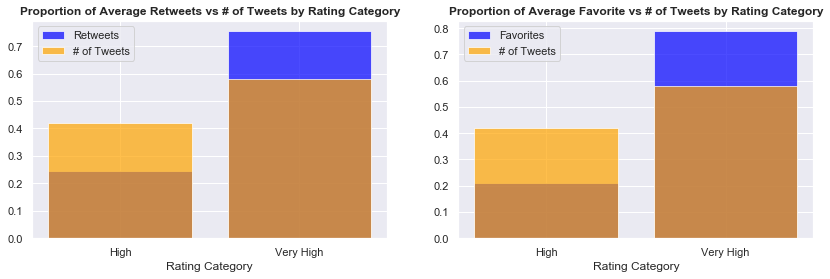

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

ax1.bar(x=prop_ave_rating_retweet.index, height=prop_ave_rating_retweet, alpha=0.7, label='Retweets', color='blue')
ax1.bar(x=prop_count_rating.index, height=prop_count_rating, alpha=0.7, label='# of Tweets', color='orange')
ax1.set_title('Proportion of Average Retweets vs # of Tweets by Rating Category', size=12, weight='bold')
ax1.set_xlabel('Rating Category')
ax1.legend();

ax2.bar(x=prop_ave_rating_favorite.index, height=prop_ave_rating_favorite, alpha=0.7, label='Favorites', color='blue')
ax2.bar(x=prop_count_rating.index, height=prop_count_rating, alpha=0.7, label='# of Tweets', color='orange')
ax2.set_title('Proportion of Average Favorite vs # of Tweets by Rating Category', size=12, weight='bold')
ax2.set_xlabel('Rating Category')
ax2.legend();

Even having more number of tweets, on average, ratings of more than 10 resulted in higher retweets and favorites. 

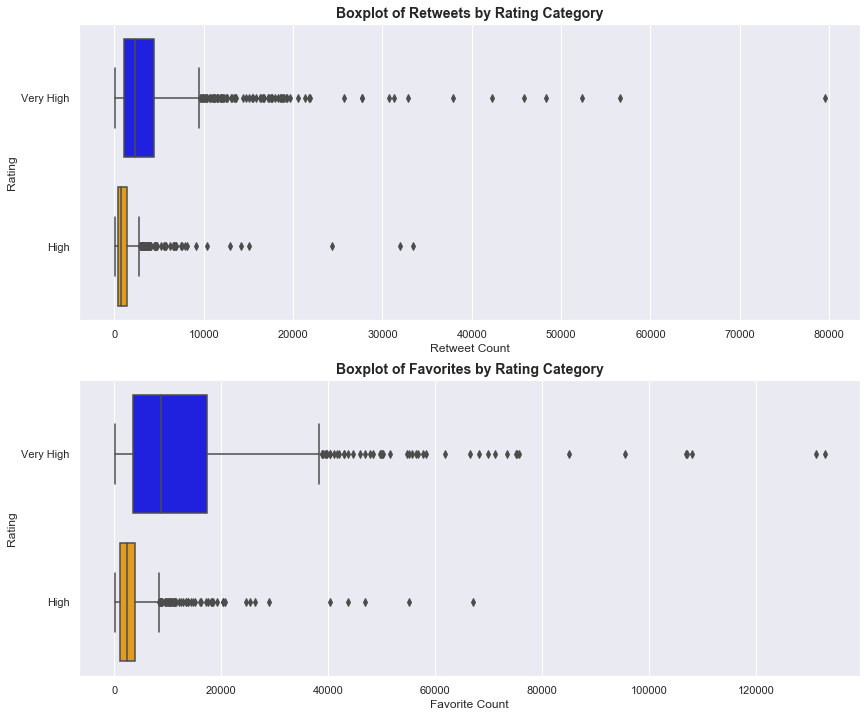

In [99]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,12))

sns.boxplot(data=df,y='rating', x='retweet_count', palette = ['blue', 'orange'], ax=ax1)
ax1.set_title('Boxplot of Retweets by Rating Category', size = 14, weight='bold')
ax1.set_ylabel('Rating')
ax1.set_xlabel('Retweet Count')

sns.boxplot(data=df,y='rating', x='favorite_count', palette = ['blue', 'orange'], ax=ax2)
ax2.set_title('Boxplot of Favorites by Rating Category', size = 14, weight='bold')
ax2.set_ylabel('Rating')
ax2.set_xlabel('Favorite Count');

A 'Very High' rating has wider IQR and higher variability towards higher observations for both retweets and favorites compared to a 'High' rating which are more concentrated on lower observations. 

### WeRateDogs Tweet Activity

In [100]:
# number of tweets per date

tweets = df.timestamp.dt.date.value_counts().sort_index()

In [101]:
# average number of retweets and favorites per date

favorite = df.groupby(df.timestamp.dt.date).mean().favorite_count
retweet = df.groupby(df.timestamp.dt.date).mean().retweet_count

In [102]:
# 30-day moving average for tweets, retweets, and favorites

tweets_MA30 = tweets.rolling(window=30).mean()
retweet_MA30 = retweet.rolling(window=30).mean()
favorite_MA30 = favorite.rolling(window=30).mean()

In [103]:
# proportion of number of tweets, retweets and favorites

prop_retweet_MA30 = retweet_MA30/retweet_MA30.sum()
prop_favorite_MA30 = favorite_MA30/favorite_MA30.sum()
prop_tweets_MA30 = tweets_MA30/tweets_MA30.sum()

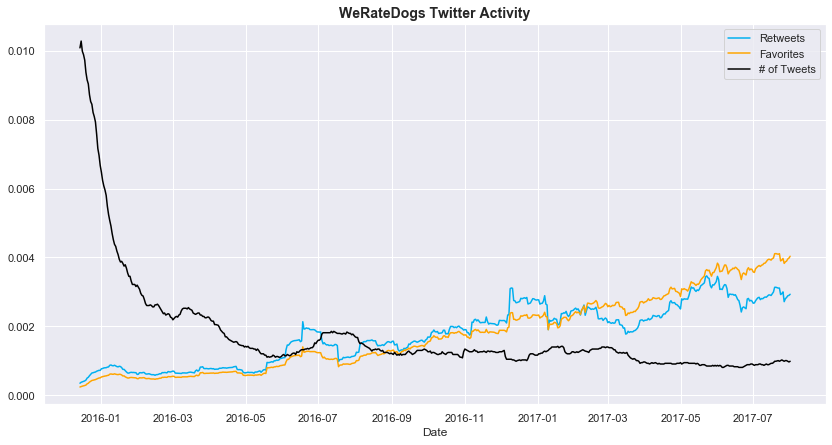

In [104]:
plt.figure(figsize=(14,7))
plt.plot(prop_retweet_MA30, color='#00B0F0', label='Retweets')
plt.plot(prop_favorite_MA30, color='orange', label='Favorites')
plt.plot(prop_tweets_MA30, color='black', label='# of Tweets')
plt.legend(bbox_to_anchor=(1,1))
plt.title('WeRateDogs Twitter Activity', size=14, weight='bold')
plt.xlabel('Date');

The number of original tweets (with images) has declined significantly since 2015. Despite this dip, the number of retweets and favorites has been steadily increasing throughout the period.